For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

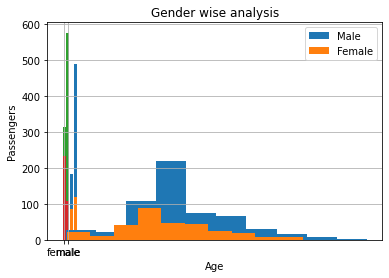

In [5]:
#import pandas and numby library seaborn and matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read data from csv and save in dataframe. PassensgerId is to be taken as index column.
titanic = pd.read_csv("titanic.csv", index_col=["PassengerId"])

#check for dataframe header and info
titanic.head()
titanic.info()

# fix missing data in age by replacing with average values in age column.
avg_ag = titanic.groupby(['Sex','Pclass'])['Age'].mean()
display(avg_ag)
def rep_age(row):
    if pd.isnull(row['Age']):
        return avg_ag[row['Sex'], row['Pclass']]
    else:
        return row['Age']
    
titanic['Age'] = titanic.apply(rep_age, axis=1)

# Check again to validate missing values
titanic.info()
titanic.describe()


#test for 1st hypothesis
survival_Class_df = titanic[['Survived', 'Pclass']]
survival_Class_df.head()
survival_Class_df.describe()

## GROUP DATA TO CHECK SURVIVAL NUMBERS & TOTAL BY PASSENGER CLASS

## calculate survived by pclass
surv_by_pclass = survival_Class_df.groupby(['Pclass']).sum()
ttl_by_pclass = survival_Class_df.groupby(['Pclass']).count()

# total are showed as survived - changed column name Total
ttl_by_pclass.rename(columns = {'Survived':'Total'}, inplace = True)

# merge separate data into one dataframe
survived_total_by_pclass = pd.merge(surv_by_pclass, ttl_by_pclass, left_index=True, right_index=True) # merge by index
survived_total_by_pclass

# calculate percentage survival rate

per_survived = (survived_total_by_pclass['Survived'] / survived_total_by_pclass['Total']) * 100
survived_total_by_pclass['Percentage'] = per_survived

survived_total_by_pclass


x = survived_total_by_pclass.index.values
y = survived_total_by_pclass.Total
z = survived_total_by_pclass.Survived

pht = plt.bar(x, y)
phs = plt.bar(x, z)

plt.xticks(x, x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Survivors by Class')


plt.legend([pht,phs],['Died', 'Survived'])


In [ ]:
#hypothesis 2 Determine if the survival rate is associated to the gender


# groupby Gender
grp_by_sex = titanic.groupby('Sex')

# calculate survived by sex
surv_by_sex = grp_by_sex['Survived'].sum()
surv_by_sex.name = 'Survived'
display(surv_by_sex)

# calculate total by sex
ttl_by_sex = grp_by_sex['Survived'].size()
ttl_by_sex.name = 'Total'
display(ttl_by_sex)

# concat the separate results into one dataframe
TotalDataset = pd.concat([surv_by_sex, ttl_by_sex], axis=1)
TotalDataset


per_surv = (TotalDataset['Survived'] / TotalDataset['Total']) * 100
TotalDataset['Percentage'] = per_surv

TotalDataset


x2 = range(len(TotalDataset.index.values))
y2 = TotalDataset.Total
z2 = TotalDataset.Survived

pht2 = plt.bar(x2, y2)
phs2 = plt.bar(x2, z2)

plt.xticks(x2, TotalDataset.index.values)
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by Gender')

plt.legend([pht2,phs2],['Died', 'Survived'])

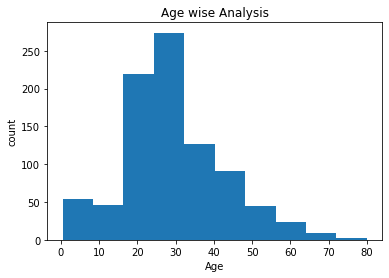

In [11]:
#hypothesis 3 Determine the survival rate is associated to the age

plt.hist(titanic.Age)
plt.title('Age wise Analysis')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

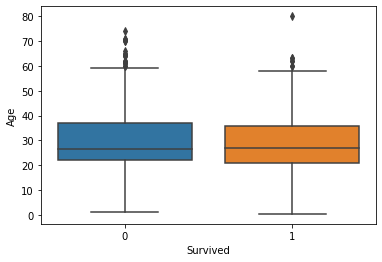

In [13]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 